ANALISIS SENTIMEN APLIKASI WONDR BY BNI PADA ULASAN GOOGLE PLAY STORE MENGGUNAKAN ALGORITMA NAIVE BAYES CLASSIFIER

**Install modul**

In [ ]:
!pip install google-play-scraper
!pip install nltk
!pip install python-crfsuite
!pip install Sastrawi

**Impor Paket yang dibutuhkan**

In [ ]:
# Library untuk mengambil ulasan dari Google Play Store
from google_play_scraper import Sort, reviews

# Library untuk manipulasi data
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan untuk tampilan plot
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')

## Library untuk preprocessing teks
import csv
import re  # Untuk pencocokan pola teks menggunakan regular expressions
import nltk
import string  # Untuk manipulasi string, seperti menghapus tanda baca
from nltk.corpus import stopwords  # Untuk mengakses kata-kata umum yang biasanya dihapus
from nltk.tokenize import word_tokenize, sent_tokenize  # Untuk tokenisasi kata dan kalimat
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Library stemming Bahasa Indonesia

## Library untuk proses vectorization teks
from sklearn.feature_extraction.text import TfidfVectorizer  # Mengubah teks menjadi TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer  # Transformasi teks menjadi TF-IDF

## Library untuk membangun model klasifikasi
from sklearn.model_selection import train_test_split  # Membagi dataset menjadi data latih dan uji
from sklearn.metrics import classification_report  # Menghasilkan laporan klasifikasi
from sklearn.naive_bayes import MultinomialNB  # Algoritma Naive Bayes untuk data berbentuk count atau TF-IDF
from sklearn.naive_bayes import BernoulliNB  # Algoritma Naive Bayes untuk data biner
from sklearn.naive_bayes import GaussianNB  # Algoritma Naive Bayes untuk data berbasis distribusi Gaussian

## Library untuk evaluasi model
from sklearn.metrics import confusion_matrix  # Untuk membuat matriks kebingungan (confusion matrix)
from sklearn.metrics import accuracy_score  # Untuk menghitung akurasi model

# Mengatur tampilan maksimal kolom data frame di pandas
pd.set_option('max_colwidth', 180)

# Library untuk membuat visualisasi WordCloud
from wordcloud import WordCloud

# Melakukan download library NLTK tambahan
from nltk.corpus import stopwords  # Mengimpor daftar stopwords untuk teks
import nltk
nltk.download('stopwords')  # Mengunduh daftar stopwords NLTK
from nltk.stem import WordNetLemmatizer  # Untuk proses lemmatization
nltk.download('wordnet')  # Mengunduh data wordnet untuk proses lemmatization

# Library untuk memproses file (unggah/unduh)
from google.colab import files

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Scraping Data**

In [ ]:
review, continuation_token = reviews(
    'id.bni.wondr',
    lang = 'id',
    country = 'id',
    sort = Sort.NEWEST,
    count = 27000
)

In [ ]:
app_reviews_df= pd.DataFrame(review)
app_reviews_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0e99257a-75a2-4dcb-aafe-3ddd1fdf6782,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Lancar,5,0,1.2.0,2024-12-11 07:57:27,"Hai Kak Ika Irawan, terima kasih untuk rating positifnya. Semoga Kakak semakin menikmati kemudahan bertransaksi dengan menggunakan wondr by BNI ya. Tks. -CX Adel-",2024-12-11 07:59:35,1.2.0
1,7573c26c-f309-4765-8e52-9e24cc7b3195,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Sudah registrasi via aplikasi,sudah di isi semua,ujung2 nya harus video call dengan agen,maksudnya apa ini,masih di tanya no ktp,no telpn,lha tadi dah di isi,nunjukin ktp juga,...",1,9,1.2.0,2024-12-11 07:39:34,"Hai Kak ꦫ꧀꧉ꦧꦸꦢꦶ ꦮꦶꦢꦶꦪꦤꦠ, maaf utk kendalanya. Aplikasi ini benar dari BNI ya Kak. Utk Video Call dipakai jika data tdk sesuai dengan yg ada di sistem BNI/Dukcapil. Kakak bisa l...",2024-12-11 07:47:56,1.2.0
2,78693e43-3e4f-4239-9302-9e794973eacb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,👍👍,5,0,None,2024-12-11 07:14:04,"Hi Mr. B PPAPK_Kurniawan Pijai Pijai, thank you for your positive review and rating. Hopefully you will enjoy the ease and convenience of using wondr by BNI even more. Tks. -CX...",2024-12-11 07:27:22,None
3,6d4d7e8a-6651-43ae-86fb-9001525b3347,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,saya baru donlow aplikasinya kmrn dan hari ini gagal di buka katanya tolong developer segera di perbaiki bug nya,1,0,1.2.0,2024-12-11 06:40:20,"Hai Kak Salsa Bila, maaf utk kendalanya. Silakan Kakak akses kembali, pastikan internet stabil, perangkat yg dipakai tdk root/jail break. Jika masih mengalami kendala yg sama, ...",2024-12-11 06:42:34,1.2.0
4,6c27d090-90eb-45a3-a9fb-94c7382cda13,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasinya bagus banget , fitur lengkap, good",5,0,None,2024-12-11 06:26:15,"Hai Kak Phui Sen, terima kasih atas review dan rating positifnya untuk aplikasi wondr by BNI. Kami senang dapat memberikan pelayanan terbaik untuk Kakak. Tks. -CX Darma-",2024-12-11 06:33:11,None
...,...,...,...,...,...,...,...,...,...,...,...
17397,87a5a553-753b-43ac-8838-601e3bd980b4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Simpel..mantab,5,2,1.0.1,2024-07-01 02:47:55,None,NaT,1.0.1
17398,e95d3b71-c5cc-4647-b808-3abb9a9a2621,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Makin simple dan lengkap. Terkoneksi dengan all sumber dana baik debet dan kredit. Makin keren,5,22,1.0.1,2024-07-01 02:45:01,None,NaT,1.0.1
17399,f77a4113-913b-49d9-878d-ab6e2bf1625b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Tampilannya keren👏👏,5,3,1.0.1,2024-07-01 02:43:33,None,NaT,1.0.1
17400,b9d34289-c81f-477e-98f7-1a6287f01357,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Canggih...,5,2,1.0.1,2024-07-01 02:33:41,None,NaT,1.0.1


In [ ]:
app_reviews_df.to_csv('wonderbybni_review.csv', index=False)

In [ ]:
df = pd.read_csv('wonderbybni_review.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0e99257a-75a2-4dcb-aafe-3ddd1fdf6782,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Lancar,5,0,1.2.0,2024-12-11 07:57:27,"Hai Kak Ika Irawan, terima kasih untuk rating positifnya. Semoga Kakak semakin menikmati kemudahan bertransaksi dengan menggunakan wondr by BNI ya. Tks. -CX Adel-",2024-12-11 07:59:35,1.2.0
1,7573c26c-f309-4765-8e52-9e24cc7b3195,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Sudah registrasi via aplikasi,sudah di isi semua,ujung2 nya harus video call dengan agen,maksudnya apa ini,masih di tanya no ktp,no telpn,lha tadi dah di isi,nunjukin ktp juga,...",1,9,1.2.0,2024-12-11 07:39:34,"Hai Kak ꦫ꧀꧉ꦧꦸꦢꦶ ꦮꦶꦢꦶꦪꦤꦠ, maaf utk kendalanya. Aplikasi ini benar dari BNI ya Kak. Utk Video Call dipakai jika data tdk sesuai dengan yg ada di sistem BNI/Dukcapil. Kakak bisa l...",2024-12-11 07:47:56,1.2.0
2,78693e43-3e4f-4239-9302-9e794973eacb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,👍👍,5,0,NaN,2024-12-11 07:14:04,"Hi Mr. B PPAPK_Kurniawan Pijai Pijai, thank you for your positive review and rating. Hopefully you will enjoy the ease and convenience of using wondr by BNI even more. Tks. -CX...",2024-12-11 07:27:22,NaN
3,6d4d7e8a-6651-43ae-86fb-9001525b3347,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,saya baru donlow aplikasinya kmrn dan hari ini gagal di buka katanya tolong developer segera di perbaiki bug nya,1,0,1.2.0,2024-12-11 06:40:20,"Hai Kak Salsa Bila, maaf utk kendalanya. Silakan Kakak akses kembali, pastikan internet stabil, perangkat yg dipakai tdk root/jail break. Jika masih mengalami kendala yg sama, ...",2024-12-11 06:42:34,1.2.0
4,6c27d090-90eb-45a3-a9fb-94c7382cda13,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasinya bagus banget , fitur lengkap, good",5,0,NaN,2024-12-11 06:26:15,"Hai Kak Phui Sen, terima kasih atas review dan rating positifnya untuk aplikasi wondr by BNI. Kami senang dapat memberikan pelayanan terbaik untuk Kakak. Tks. -CX Darma-",2024-12-11 06:33:11,NaN


**EDA**

In [ ]:
df = pd.read_csv('sentiment_review_fix.csv')

In [ ]:
df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,2441
at,0
replyContent,5711
repliedAt,5711


In [ ]:
df.dropna(axis=1, inplace=True)

In [ ]:
len(df.index)

10715

In [ ]:
df.drop(['reviewId'], axis=1, inplace=True)

In [ ]:
df.drop(['userName'], axis=1, inplace=True)

In [ ]:
df.drop(['userImage'], axis=1, inplace=True)

In [ ]:
df.drop(['thumbsUpCount'], axis=1, inplace=True)

In [ ]:
df.drop(['at'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
content,0
score,0


In [ ]:
df.describe()

,score,sentiment_encoded
count,10715.000000,10715.000000
mean,3.191974,0.498833
std,1.813194,0.500022
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,5370
Positive,5345


In [ ]:
# Hitung value counts dengan persentase
value_counts = df['sentiment'].value_counts(normalize=True) * 100
value_counts

,proportion
sentiment,
Negative,50.116659
Positive,49.883341


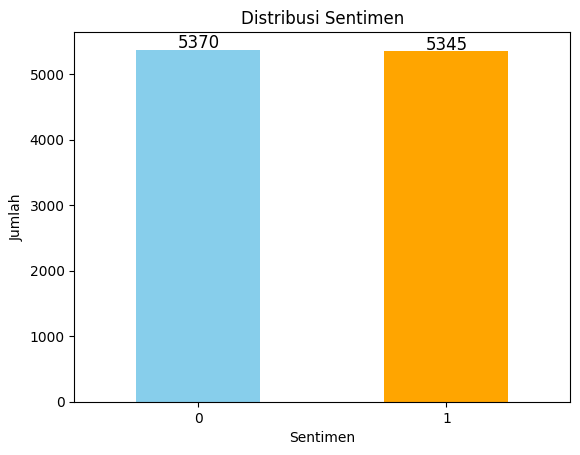

In [ ]:
import matplotlib.pyplot as plt

# Plot distribusi target
ax = df['sentiment_encoded'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])

# Menambahkan jumlah pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Menambahkan judul dan label
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

# Menampilkan plot
plt.show()

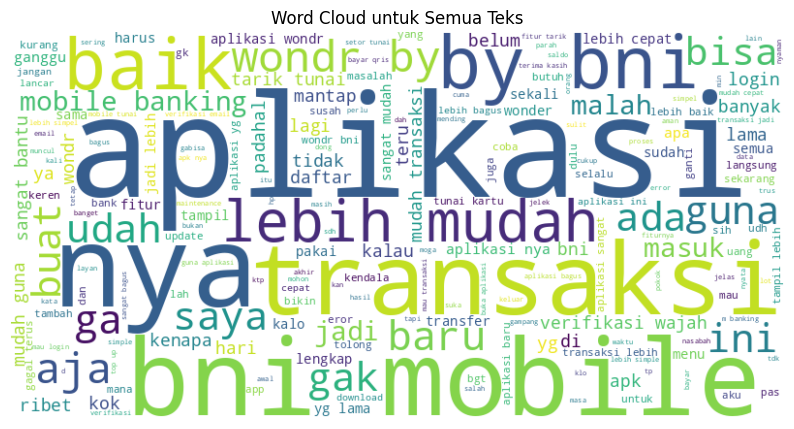

In [ ]:
from wordcloud import WordCloud

# Gabungkan semua teks menjadi satu string
all_text = ' '.join(df['content'])

# Membuat word cloud
wordcloud = WordCloud(stopwords='english', background_color='white', width=800, height=400).generate(all_text)

# Menampilkan word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Semua Teks')
plt.show()

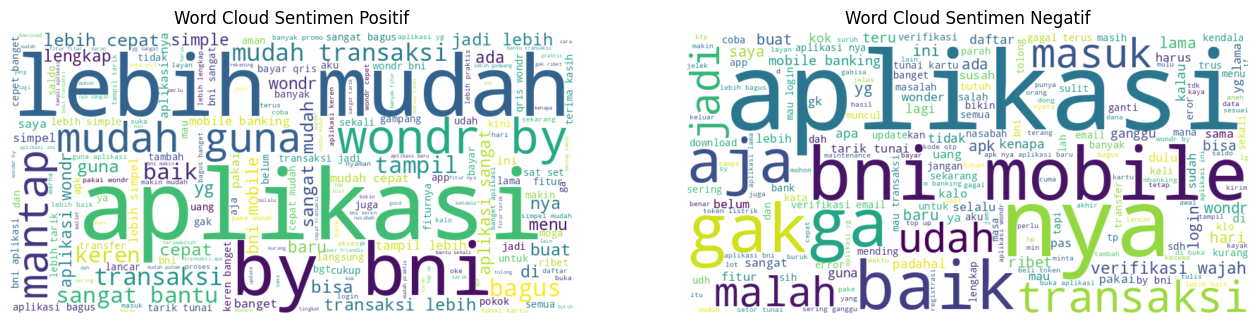

In [ ]:
# Filter teks positif dan negatif
positive_text = ' '.join(df[df['sentiment_encoded'] == 1]['content'])
negative_text = ' '.join(df[df['sentiment_encoded'] == 0]['content'])

# Membuat word cloud untuk teks positif dan negatif
positive_wordcloud = WordCloud(stopwords='english', background_color='white', width=800, height=400).generate(positive_text)
negative_wordcloud = WordCloud(stopwords='english', background_color='white', width=800, height=400).generate(negative_text)

# Plotting wordcloud positif dan negatif
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Positif
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Word Cloud Sentimen Positif')

# Negatif
axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Word Cloud Sentimen Negatif')

plt.show()

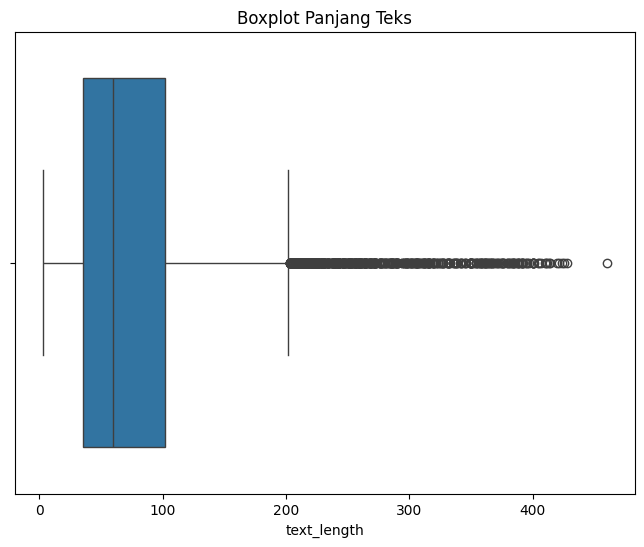

In [ ]:
# Plot boxplot untuk memeriksa outliers pada panjang teks
df['text_length'] = df['content'].apply(len)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['text_length'])
plt.title('Boxplot Panjang Teks')
plt.show()

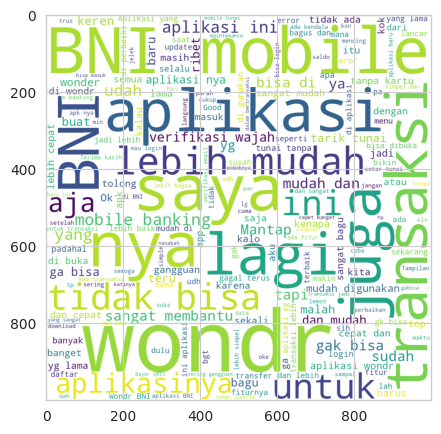

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(background_color='white', width=1000, height=1000).generate(' '.join(df['content']))
plt.figure(figsize=(5,5))
plt.imshow(wc)

**PREPROCESSING DATA**

**Cleaning Teks**

In [ ]:
def clean_text(text):
  # mengubah semua karakter huruf menjadi huruf kecil
  text = text.lower()
  # menghilangkan punctuation
  text = re.sub('@[^\s]+', '', text)
  # menghilangkan angka
  text = re.sub('\d+', '', text)
  # menghilangkan URL
  text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
  text = re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\s', '', text)
  # menghilangkan Hastag
  text = re.sub(r'#[^\s]+', '', text)
  # menghilangkan Huruf Tunggal
  text = re.sub(r'\b[a-zA-Z]\b', '', text)
  return text

clean = lambda x: clean_text(x)

dfx = pd.DataFrame(df.content.apply(clean))
dfx

,content
0,lancar
1,"sudah registrasi via aplikasi,sudah di isi semua,ujung nya harus video call dengan agen,maksudnya apa ini,masih di tanya no ktp,no telpn,lha tadi dah di isi,nunjukin ktp juga,i..."
2,👍👍
3,saya baru donlow aplikasinya kmrn dan hari ini gagal di buka katanya tolong developer segera di perbaiki bug nya
4,"aplikasinya bagus banget , fitur lengkap, good"
...,...
17397,simpel..mantab
17398,makin simple dan lengkap. terkoneksi dengan all sumber dana baik debet dan kredit. makin keren
17399,tampilannya keren👏👏
17400,canggih...


**Pelabelan**

In [ ]:
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

def determine_sentiment(text):
  positive_count = sum(1 for word in text.split() if word in positive_lexicon)
  negative_count = sum(1 for word in text.split() if word in negative_lexicon)
  if positive_count > negative_count:
    return "Positive"
  elif positive_count < negative_count:
    return "Negative"
  else:
    return "neutral"

df['sentiment'] = df['content'].apply(determine_sentiment)
df.head()

,content,score,sentiment
0,Lancar,5,neutral
1,"Sudah registrasi via aplikasi,sudah di isi semua,ujung2 nya harus video call dengan agen,maksudnya apa ini,masih di tanya no ktp,no telpn,lha tadi dah di isi,nunjukin ktp juga,...",1,Negative
2,👍👍,5,neutral
3,saya baru donlow aplikasinya kmrn dan hari ini gagal di buka katanya tolong developer segera di perbaiki bug nya,1,Negative
4,"Aplikasinya bagus banget , fitur lengkap, good",5,Positive


**Splitting data untuk melakukan handling data yang ambigu atau tidak valid**

In [ ]:
import pandas as pd

# Baca file CSV
df = pd.read_csv("wonderbybnistemmed.csv")

# Cek beberapa baris untuk memastikan data terbaca
print(df.head())

# Aturan validasi:
# - Score 4 atau 5 harus sentiment positif
# - Score 1 atau 2 harus sentiment negatif
# Buat filter untuk data yang sesuai aturan
valid_data = df[
    ((df['score'] >= 4) & (df['sentiment'] == 'Positive')) |  # Score 4-5 dengan sentiment positif
    ((df['score'] <= 3) & (df['sentiment'] == 'Negative'))    # Score 1-2 dengan sentiment negatif
]

# Hapus data yang tidak sesuai (data yang tidak ada di valid_data)
invalid_data = df[~df.index.isin(valid_data.index)]  # Data tidak valid
print(f"Jumlah data tidak valid yang dihapus: {len(invalid_data)}")

# Simpan kembali data valid ke file CSV baru (opsional)
valid_data.to_csv("cleaned_file_review.csv", index=False)

# Jika ingin melihat data yang tidak valid untuk analisis
invalid_data.to_csv("invalid_data.csv", index=False)


**Handle data yang ambigu dan tidak valid**

In [ ]:
# Baca file CSV
df = pd.read_csv("invalid_data.csv")

# Proses invalid data
# - Score 4-5 dengan sentiment 'negative' diubah menjadi 'positive'
# - Score 1-2 dengan sentiment 'positive' diubah menjadi 'negative'

def fix_sentiment(row):
    if row['score'] >= 4 and row['sentiment'] == 'Negative':
        row['sentiment'] = 'Positive'
    elif row['score'] <= 3 and row['sentiment'] == 'Positive':
        row['sentiment'] = 'Negative'
    return row

invalid_data_fixed = invalid_data.apply(fix_sentiment, axis=1)

**Menggabungkan 2 csv antara data valid dan data yang tidak valid yang sudah di handle**

In [ ]:
#Menggabungkan file valid dan invalid
file1 = pd.read_csv("cleaned_file_review.csv")
file2 = pd.read_csv("fixed_invalid_data.csv")

merged_data = pd.concat([file1, file2], ignore_index=True)

merged_data.to_csv("review_paling_fix.csv", index=False)

**Menghapus data yang memiliki sentiment Neutral, karena jumlah data yang memiliki sentiment Neutral sangat banyak dan membuat data menjadi bias ketika di modelkan**

In [ ]:
# Baca file CSV
df = pd.read_csv("review_paling_fix.csv")

# Cek beberapa baris untuk memastikan data terbaca
print(df.head())

# Hapus baris dengan sentiment 'neutral'
df = df[df['sentiment'] != 'neutral']

# Simpan kembali data yang sudah dibersihkan ke file CSV baru
df.to_csv("cleaned_file_no_neutral.csv", index=False)

**Stopword Removal**

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Inisialisasi penghapus stopword
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Fungsi untuk menghapus stopword
def remove_stopwords_sastrawi(text):
    return stopword_remover.remove(text)

# Terapkan ke kolom 'content'
df['content'] = df['content'].apply(remove_stopwords_sastrawi)

**Menghilangkan Emoji dalam teks**

In [ ]:
def remove_emoji(text):
    # Regular expression untuk mendeteksi emoji
    emoji_pattern = re.compile(
        "[\U00010000-\U0010ffff\U00002000-\U00002BFF\U00003000-\U00003FFF"
        "\U00004000-\U00004FFF\U00005000-\U00005FFF\U00006000-\U00006FFF"
        "\U00007000-\U00007FFF\U00008000-\U00008FFF\U00009000-\U00009FFF"
        "\U0000A000-\U0000AFFF\U0000B000-\U0000BFFF\U0000C000-\U0000CFFF"
        "\U0000D000-\U0000DFFF\U0000E000-\U0000EFFF\U0000F000-\U0000FFFF"
        "\U00010000-\U0010FFFF]", flags=re.UNICODE)

    # Hapus emoji dari teks
    return re.sub(emoji_pattern, '', text)

# Contoh penggunaan:
df['content'] = df['content'].apply(remove_emoji)

**Tokenizing**

In [ ]:
import nltk
nltk.download('punkt_tab')  # Mengunduh tokenizer model

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

# Fungsi untuk tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Contoh penggunaan
df['content'] = df['content'].apply(tokenize_text)

In [ ]:
df.head()

,content,score,sentiment
0,[lancar],5,neutral
1,"[sudah, registrasi, via, aplikasi, sudah, isi, semua, ujung2, nya, video, call, agen, maksud, apa, ini, masih, tanya, no, ktp, no, telpn, lha, tadi, dah, isi, nunjukin, ktp, ju...",1,Negative
3,"[baru, donlow, aplikasi, kmrn, hari, gagal, buka, kata, developer, segera, baik, bug, nya]",1,Negative
4,"[aplikasi, bagus, banget, fitur, lengkap, good]",5,Positive
5,[mantap],5,neutral


**Stemming**

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['content'] = df['content'].apply(stemmer.stem)

**Label Encoding Atribut Sentiment**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Misalnya kolom sentiment ada di dataframe df
sentiments = df['sentiment']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Transformasikan label menjadi angka
df['sentiment_encoded'] = label_encoder.fit_transform(sentiments)

# Melihat hasil encoding
print(df[['sentiment', 'sentiment_encoded']].head())

# Jika ingin melihat mapping label ke angka
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping Label ke Angka:", label_mapping)

  sentiment  sentiment_encoded
0  Negative                  0
1  Negative                  0
2  Positive                  1
3  Negative                  0
4  Negative                  0
Mapping Label ke Angka: {'Negative': 0, 'Positive': 1}


**SKENARIO 1**

TF-IDF

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Memuat data
file_path = 'sentiment_review_fix.csv'
df = pd.read_csv(file_path)

# Memisahkan fitur dan target
X = df['content']
y = df['sentiment_encoded']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mengubah teks menjadi fitur numerik dengan TF-IDF
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Model Training

Accuracy: 0.8945
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1074
           1       0.94      0.84      0.89      1069

    accuracy                           0.89      2143
   macro avg       0.90      0.89      0.89      2143
weighted avg       0.90      0.89      0.89      2143

Confusion Matrix:
[[1016   58]
 [ 168  901]]


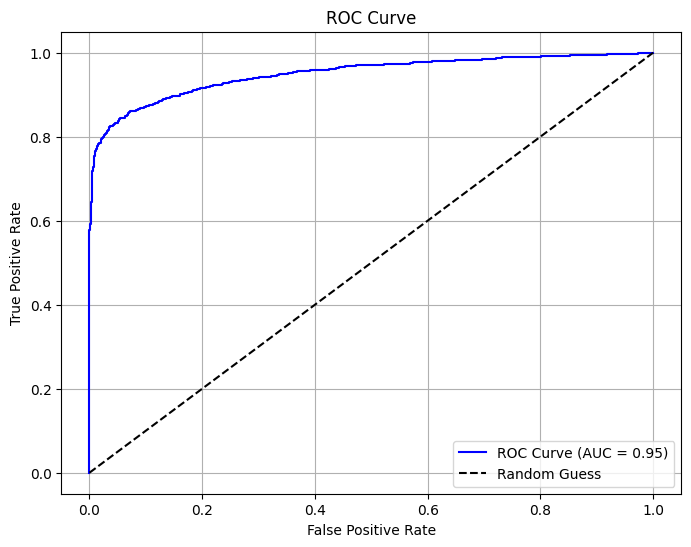

In [ ]:
# Melatih model Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Memprediksi probabilitas untuk ROC-AUC
y_probs = model.predict_proba(X_test_tfidf)[:, 1]

# Menghitung akurasi dan classification report
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Menghitung ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

**SKENARIO 2**

TF-IDF

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Memuat data
file_path = 'sentiment_review_fix.csv'
df = pd.read_csv(file_path)

# Memisahkan fitur dan target
X = df['content']
y = df['sentiment_encoded']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Mengubah teks menjadi fitur numerik dengan TF-IDF
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Model Training

Accuracy: 0.8933
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1611
           1       0.94      0.84      0.89      1604

    accuracy                           0.89      3215
   macro avg       0.90      0.89      0.89      3215
weighted avg       0.90      0.89      0.89      3215

Confusion Matrix:
[[1522   89]
 [ 254 1350]]


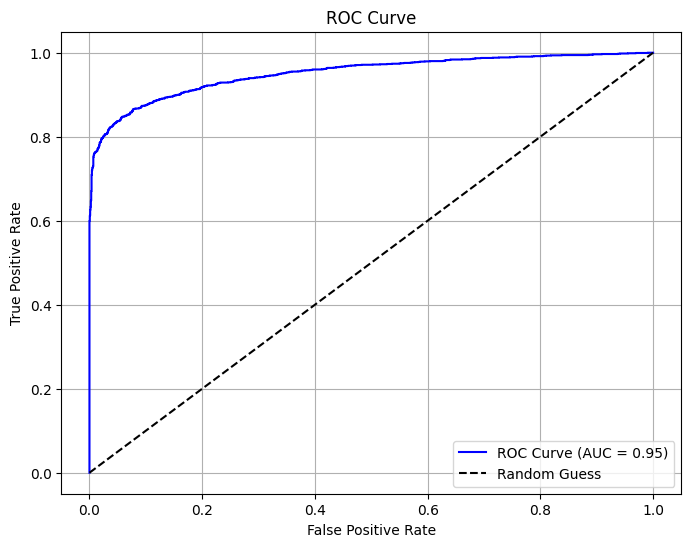

In [ ]:
# Melatih model Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Memprediksi probabilitas untuk ROC-AUC
y_probs = model.predict_proba(X_test_tfidf)[:, 1]

# Menghitung akurasi dan classification report
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Menghitung ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

**SKENARIO 3**

TF-IDF

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Memuat data
file_path = 'sentiment_review_fix.csv'
df = pd.read_csv(file_path)

# Memisahkan fitur dan target
X = df['content']
y = df['sentiment_encoded']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Mengubah teks menjadi fitur numerik dengan TF-IDF
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Model Training

Accuracy: 0.8936
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2148
           1       0.94      0.84      0.89      2138

    accuracy                           0.89      4286
   macro avg       0.90      0.89      0.89      4286
weighted avg       0.90      0.89      0.89      4286

Confusion Matrix:
[[2039  109]
 [ 347 1791]]


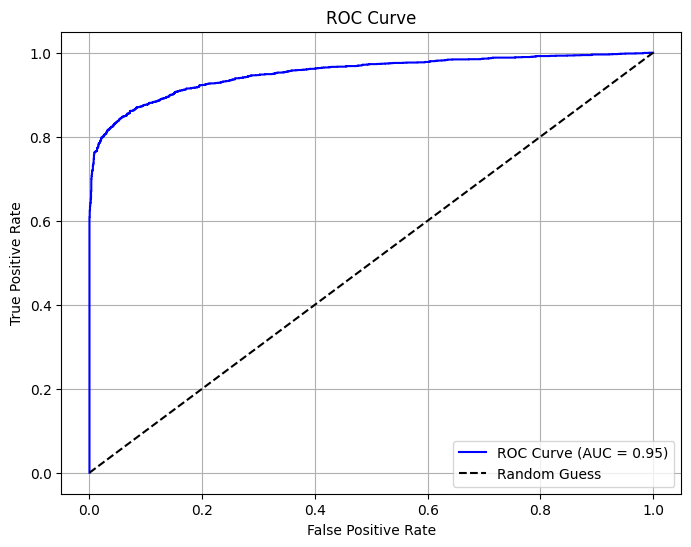

In [ ]:
# Melatih model Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Memprediksi probabilitas untuk ROC-AUC
y_probs = model.predict_proba(X_test_tfidf)[:, 1]

# Menghitung akurasi dan classification report
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Menghitung ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()